In [5]:
!unzip test.zip

Archive:  test.zip
   creating: test/
   creating: test/bad/
  inflating: test/bad/download (1).jpg  
  inflating: test/bad/download (2).jpg  
  inflating: test/bad/download (3).jpg  
  inflating: test/bad/download (4).jpg  
  inflating: test/bad/download (5).jpg  
  inflating: test/bad/download.jpg   
  inflating: test/bad/images (1).jpg  
  inflating: test/bad/images (10).jpg  
  inflating: test/bad/images (11).jpg  
  inflating: test/bad/images (12).jpg  
  inflating: test/bad/images (13).jpg  
  inflating: test/bad/images (14).jpg  
  inflating: test/bad/images (15).jpg  
  inflating: test/bad/images (16).jpg  
  inflating: test/bad/images (2).jpg  
  inflating: test/bad/images (3).jpg  
  inflating: test/bad/images (4).jpg  
  inflating: test/bad/images (5).jpg  
  inflating: test/bad/images (6).jpg  
  inflating: test/bad/images (7).jpg  
  inflating: test/bad/images (8).jpg  
  inflating: test/bad/images (9).jpg  
  inflating: test/bad/images.jpg     
  inflating: test/bad/j (1)

In [6]:
!unzip train.zip

Archive:  train.zip
   creating: train/
   creating: train/bad/
  inflating: train/bad/80 (1).jpg    
  inflating: train/bad/80 (10).jpg   
  inflating: train/bad/80 (11).jpg   
  inflating: train/bad/80 (12).jpg   
  inflating: train/bad/80 (13).jpg   
  inflating: train/bad/80 (14).jpg   
  inflating: train/bad/80 (15).jpg   
  inflating: train/bad/80 (16).jpg   
  inflating: train/bad/80 (17).jpg   
  inflating: train/bad/80 (18).jpg   
  inflating: train/bad/80 (19).jpg   
  inflating: train/bad/80 (2).jpg    
  inflating: train/bad/80 (20).jpg   
  inflating: train/bad/80 (21).jpg   
  inflating: train/bad/80 (22).jpg   
  inflating: train/bad/80 (23).jpg   
  inflating: train/bad/80 (24).jpg   
  inflating: train/bad/80 (25).jpg   
  inflating: train/bad/80 (26).jpg   
  inflating: train/bad/80 (27).jpg   
  inflating: train/bad/80 (28).jpg   
  inflating: train/bad/80 (3).jpg    
  inflating: train/bad/80 (4).jpg    
  inflating: train/bad/80 (5).jpg    
  inflating: train/bad/8

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1753 files belonging to 2 classes.
Found 435 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [15]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 450s 8s/step - accuracy: 0.6526 - loss: 3.0403 - val_accuracy: 0.4598 - val_loss: 9.3156
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.6848 - loss: 1.3429 - val_accuracy: 0.5425 - val_loss: 1.6544
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 448s 8s/step - accuracy: 0.6762 - loss: 0.7486 - val_accuracy: 0.5195 - val_loss: 1.8812
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 502s 8s/step - accuracy: 0.7537 - loss: 0.5661 - val_accuracy: 0.5931 - val_loss: 1.2044
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 445s 8s/step - accuracy: 0.7725 - loss: 0.4870 - val_accuracy: 0.5379 - val_loss: 0.9601


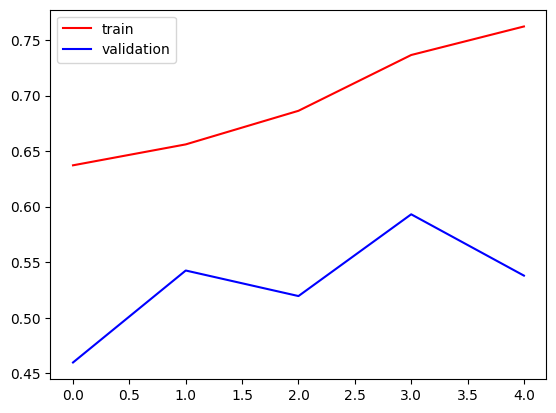

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

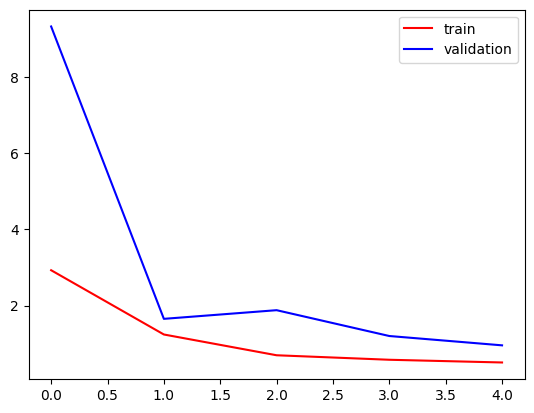

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [19]:
test_img = cv2.imread('/content/demo (5).jpg')

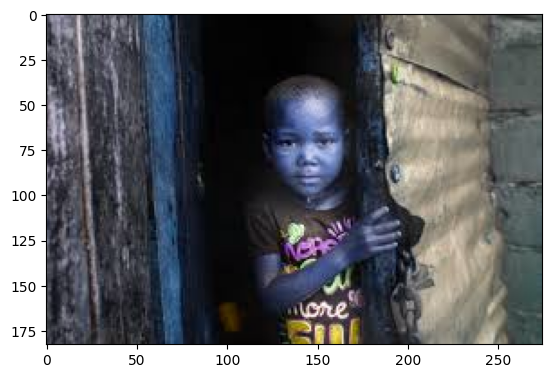

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(183, 275, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


array([[1.]], dtype=float32)